In [130]:
import pandas as pd
import numpy as np
import boto
import semopy
import scipy.stats as stats
import pingouin as pg
import seaborn as sns
import matplotlib. pyplot as plt  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
#warnings.filterwarnings('ignore')

## Model 1. Findings the factors having impacts to Employee Engagement

In [2]:
#import data
data_sem = pd.read_excel('data_simulated_modeling.xlsx', sheet_name='data_olah2')
data_sem

Y1  Y2  Y3  Y4  Y5  X11  X12  X13  X14  X15  X21  X22  X23  X24  X31  X32  X33  X34  X41  X42  X43  X44  X51  X52  X53  X54  X55  X56  X57  X58  X61  X62  X63  X64  X65  X66  X71  X72  X73  X74  X75  X_1  X_2  X_3  X_4  X_5  X_6  X_7  Y_y   X1    X2    X3    X4     X5        X6   X7    Y JenisKelamin   Usia                        Departemen LokasiPerusahaan StatusPegawai       Gaji  KecerdasanIntelektual  KecerdasanEmosi StatusPernikahan     Kinerja  EmployeeEngagementIndex  LamaBekerja       Pendidikan  EmployeeEngagementIndex2
0     3   3   3   3   5    4    4    3    3    4    4    2    2    2    3    3    4    3    3    4    5    4    4    5    3    4    3    4    3    5    4    4    2    1    2    1    3    1    3    4    4   18   10   13   16   31   14   15   17  3.6  2.50  3.25  4.00  3.875  2.333333  3.0  3.4    Perempuan  36-40  HRD (Human Resources Department)      DKI Jakarta         Tetap  4400000.0                    106               54    Belum Menikah   95.221309                     68.0            7  SMA/SMK/Diploma                      0.68
1     5   5   4   3   3    3    5    3    3    3    4    2    3    2    3    3    5    3    3    5    5    5    5    5    3    4    3    5    3    4    3    4    1    3    1    2    3    3    4    5    5   17   11   14   18   32   14   20   20  3.4  2.75  3.50  4.50  4.000  2.333333  4.0  4.0    Perempuan  36-40                        Production           Banten         Tetap  5000000.0                    108               64          Menikah  112.771267                     80.0            9               S2                      0.80
2     4   5   4   5   5    3    4    4    3    3    3    1    1    3    3    4    5    3    3    4    4    4    4    4    3    3    5    4    3    5    3    4    4    1    1    2    3    1    3    4    4   17    8   15   15   31   15   15   23  3.4  2.00  3.75  3.75  3.875  2.500000  3.0  4.6    Laki-laki  41-45                        Accounting    DI Yogyakarta         Tetap  6600000.0                    110               74          Menikah  129.748641                     92.0           10               S2                      0.92
3     5   5   2   3   4    4    3    3    3    4    1    1    3    1    3    3    3    3    4    3    3    3    3    5    3    3    5    4    3    4    2    5    4    3    3    3    3    3    5    4    4   17    6   12   13   30   20   19   19  3.4  1.50  3.00  3.25  3.750  3.333333  3.8  3.8    Laki-laki  41-45                         Warehouse            Jambi         Tetap  5800000.0                    107               61    Belum Menikah  106.795522                     76.0            8            S1/D4                      0.76
4     1   2   3   1   3    4    3    3    3    4    3    1    4    3    3    4    4    3    3    5    5    4    5    5    3    3    3    3    3    3    2    5    3    3    3    3    3    3    4    2    2   17   11   14   17   28   19   14   10  3.4  2.75  3.50  4.25  3.500  3.166667  2.8  2.0    Laki-laki  31-35                   General Affairs      DKI Jakarta       Kontrak  3000000.0                    104               32    Belum Menikah   56.935598                     40.0            4  SMA/SMK/Diploma                      0.40
5     1   1   2   1   3    4    3    3    3    4    4    1    3    1    3    4    4    3    3    3    5    5    3    5    3    4    3    3    3    3    4    4    3    2    1    1    3    2    5    1    2   17    9   14   16   27   15   13    8  3.4  2.25  3.50  4.00  3.375  2.500000  2.6  1.6    Perempuan  31-35                         Warehouse    DI Yogyakarta       Kontrak  2600000.0                    103               25   Pernah Menikah   45.299893                     32.0            3  SMA/SMK/Diploma                      0.32
6     4   5   2   3   4    3    5    3    3    2    4    1    2    1    3    3    3    4    3    4    3    3    5    4    3    3    5    5    3    3    2    5    1    3    3    3    3    3    5    4    5   16    8   13   13  

In [3]:
data_sem.columns

Index(['Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'X11', 'X12', 'X13', 'X14', 'X15', 'X21', 'X22', 'X23', 'X24', 'X31', 'X32', 'X33', 'X34', 'X41', 'X42', 'X43', 'X44', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X71', 'X72', 'X73', 'X74', 'X75', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'Y_y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Y', 'JenisKelamin', 'Usia', 'Departemen', 'LokasiPerusahaan', 'StatusPegawai', 'Gaji', 'KecerdasanIntelektual', 'KecerdasanEmosi', 'StatusPernikahan', 'Kinerja', 'EmployeeEngagementIndex', 'LamaBekerja', 'Pendidikan', 'EmployeeEngagementIndex2'], dtype='object')

In [4]:
#Validity and Realibility Test
LingkunganKerja = data_sem[['X11', 'X12', 'X13', 'X14', 'X15','X_1']]
BudayaKerja = data_sem[['X21', 'X22', 'X23', 'X24', 'X_2']]
Reward = data_sem[['X31', 'X32', 'X33', 'X34', 'X_3']]
DukunganManajemen = data_sem[['X41', 'X42', 'X43', 'X44', 'X_4']]
KesempatanBerkembang = data_sem[['X51', 'X52', 'X53', 'X54', 'X55','X56','X57','X58','X_5']]
Kepemimpinan = data_sem[['X61', 'X62', 'X63', 'X64', 'X65','X66','X_6']]
Kesejahteraan = data_sem[['X71', 'X72', 'X73', 'X74','X_7']]
EmployeeEngagement = data_sem[['Y1', 'Y2', 'Y3', 'Y4', 'Y5','Y_y']]

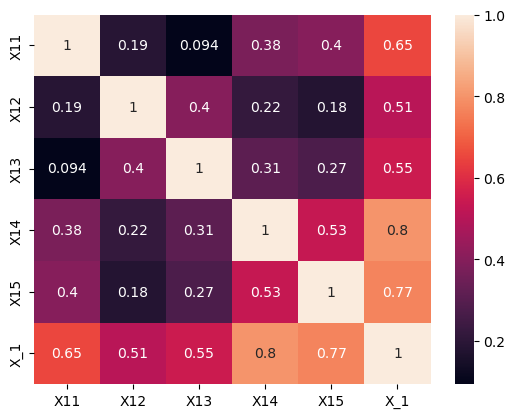

In [5]:
#Validity Test
#Show the correlation matrix LingkunganKerja
correlation = LingkunganKerja.corr()  
heatmapX1 = sns.heatmap(correlation, annot = True)  
plt.show()

Look the corr value of X_1 and other indicators X11, X12, etc are r>0.3, so that questionnare in X1 is valid.

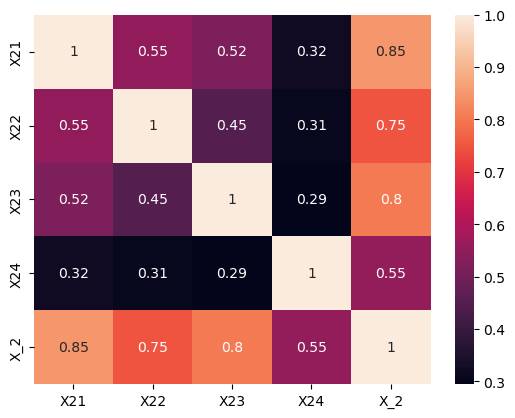

In [6]:
#Show the correlation matrix BudayaKerja
correlationX2 = BudayaKerja.corr()  
heatmapX2 = sns.heatmap(correlationX2, annot = True)  
plt.show()

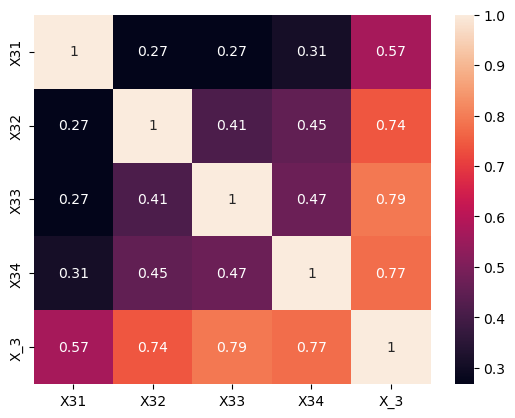

In [7]:
#Show the correlation matrix Reward
correlationX3 = Reward.corr()  
heatmapX3 = sns.heatmap(correlationX3, annot = True)  
plt.show()

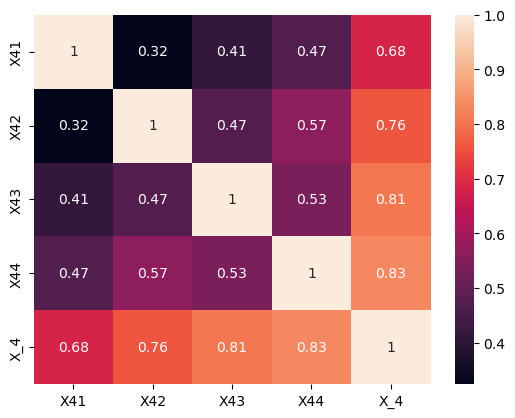

In [8]:
#Show the correlation matrix DukunganManajemen
correlationX4 = DukunganManajemen.corr()  
heatmapX4 = sns.heatmap(correlationX4, annot = True)  
plt.show()

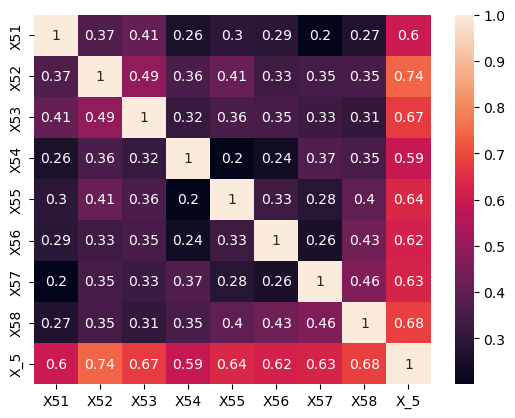

In [9]:
#Show the correlation matrix KesempatanBerkembang
correlationX5 = KesempatanBerkembang.corr()  
heatmapX5 = sns.heatmap(correlationX5, annot = True)  
plt.show()

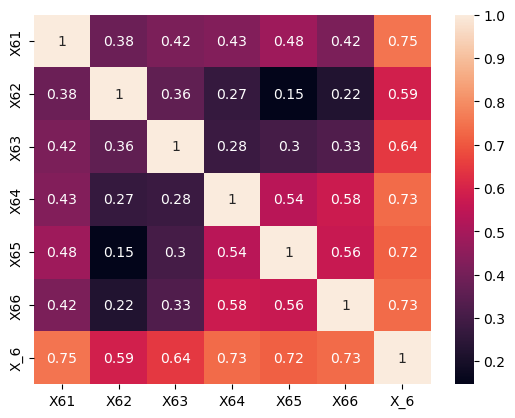

In [10]:
#Show the correlation matrix Kepemimpinan
correlationX6 = Kepemimpinan.corr()  
heatmapX6 = sns.heatmap(correlationX6, annot = True)  
plt.show()

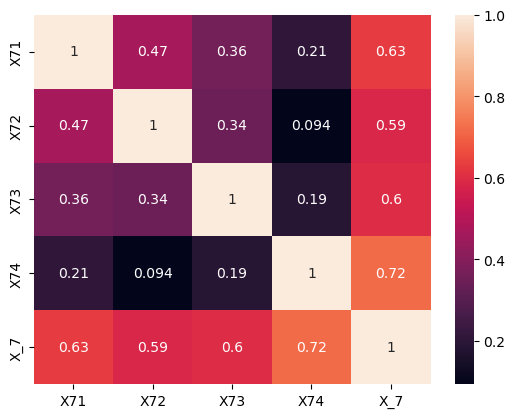

In [11]:
#Show the correlation matrix Kesejahteraan
correlationX7 = Kesejahteraan.corr()  
heatmapX7 = sns.heatmap(correlationX7, annot = True)  
plt.show()

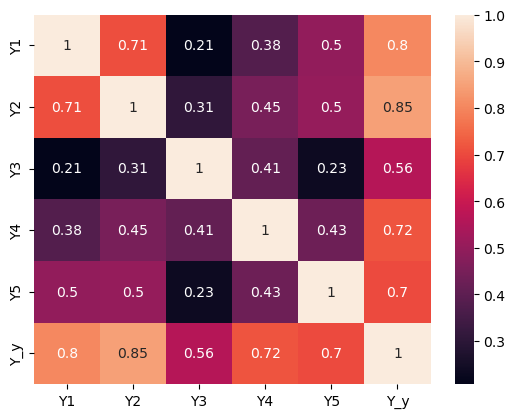

In [12]:
#Show the correlation matrix EmployeeEngagement
correlationY = EmployeeEngagement.corr()  
heatmapY = sns.heatmap(correlationY, annot = True)  
plt.show()

From the all variable (including feature and target) results, we know that the all data is valid

In [13]:
#Reliability Test
reliabilityX1 = pg.cronbach_alpha(data=LingkunganKerja)
reliabilityX2 = pg.cronbach_alpha(data=BudayaKerja)
reliabilityX3 = pg.cronbach_alpha(data=Reward)
reliabilityX4 = pg.cronbach_alpha(data=DukunganManajemen)
reliabilityX5 = pg.cronbach_alpha(data=KesempatanBerkembang)
reliabilityX6 = pg.cronbach_alpha(data=Kepemimpinan)
reliabilityX7 = pg.cronbach_alpha(data=Kesejahteraan)
reliabilityY = pg.cronbach_alpha(data=EmployeeEngagement)
realibility_all = pd.DataFrame([('LingkunganKerja', reliabilityX1[0]), ('BudayaKerja', reliabilityX2[0]),
                                ('Reward', reliabilityX3[0]),('DukunganManajemen', reliabilityX4[0]),
                                ('KesempatanBerkembang',reliabilityX5[0]), ('Kepemimpinan', reliabilityX6[0]),
                                ('Kesejahteraan', reliabilityX7[0]),('EmployeeEngagement', reliabilityY[0])], 
                               columns =['Variabel', 'Cronbachs Alpha'])
realibility_all

Variabel  Cronbachs Alpha
0       LingkunganKerja         0.763726
1           BudayaKerja         0.794761
2                Reward         0.787731
3     DukunganManajemen         0.806478
4  KesempatanBerkembang         0.758777
5          Kepemimpinan         0.773707
6         Kesejahteraan         0.697714
7    EmployeeEngagement         0.786994

From realibility test, all variables are realible in which the Cronbach's Alpha>0.6

In [14]:
#Specify the model relations using the same syntax given before
model_spec = """
    # measurement model
    Y =~ Y1 + Y2 + Y3 + Y4 + Y5
    X1 =~ X11 + X12 + X13 + X14 + X15
    X2 =~ X21 + X22 + X23 + X24
    X3 =~ X31 + X32 + X33 + X34
    X4 =~ X41 + X42 + X43 + X44
    X5 =~ X51 + X52 + X53 + X54 + X55 + X56 + X57 + X58
    X6 =~ X61 + X62 + X63 + X64 + X65 + X66
    X7 =~ X71 + X72 + X73 + X74 + X75
    
    # regressions
    Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7
"""

# Instantiate the model
model = semopy.Model(model_spec)

# Fit the model using the data
model.fit(data_sem)

# Show the results using the inspect method
model.inspect()

lval  op rval  Estimate  Std. Err    z-value   p-value
0      Y   ~   X1  1.537909  0.791513   1.942998  0.052016
1      Y   ~   X2  0.014798  0.203943   0.072562  0.942155
2      Y   ~   X3  0.733306  0.310374   2.362649  0.018145
3      Y   ~   X4 -0.048201  0.322118  -0.149636  0.881052
4      Y   ~   X5  0.344248  0.279232   1.232837  0.217636
5      Y   ~   X6  0.270951  0.086787   3.122023  0.001796
6      Y   ~   X7  0.282019  0.915404   0.308081   0.75802
7     Y1   ~    Y  1.000000         -          -         -
8     Y2   ~    Y  1.046110  0.095907  10.907595       0.0
9     Y3   ~    Y  0.458264  0.075151   6.097913       0.0
10    Y4   ~    Y  0.659703   0.07985   8.261743       0.0
11    Y5   ~    Y  0.570460  0.064699   8.817076       0.0
12   X11   ~   X1  1.000000         -          -         -
13   X12   ~   X1  0.558381  0.125715   4.441639  0.000009
14   X13   ~   X1  0.668892  0.135446   4.938449  0.000001
15   X14   ~   X1  2.037326  0.304262   6.695956       0.0
16   X15   ~   X1  1.235523  0.223008   5.540275       0.0
17   X21   ~   X2  1.000000         -          -         -
18   X22   ~   X2  0.610628   0.07186    8.49743       0.0
19   X23   ~   X2  0.815714  0.105561   7.727439       0.0
20   X24   ~   X2  0.318559  0.056663   5.621993       0.0
21   X31   ~   X3  1.000000         -          -         -
22   X32   ~   X3  1.932582  0.426037   4.536184  0.000006
23   X33   ~   X3  2.543108  0.549512   4.627942  0.000004
24   X34   ~   X3  2.170724  0.464334   4.674918  0.000003
25   X41   ~   X4  1.000000         -          -         -
26   X42   ~   X4  1.407956  0.215533   6.532441       0.0
27   X43   ~   X4  1.644534  0.255654   6.432646       0.0
28   X44   ~   X4  1.780570  0.252344   7.056108       0.0
29   X51   ~   X5  1.000000         -          -         -
30   X52   ~   X5  1.619173  0.268819   6.023288       0.0
31   X53   ~   X5  0.942591  0.159896    5.89501       0.0
32   X54   ~   X5  0.867952  0.172441   5.033318       0.0
33   X55   ~   X5  1.103948  0.193588    5.70256       0.0
34   X56   ~   X5  1.033791  0.189887   5.444231       0.0
35   X57   ~   X5  1.043879  0.193046   5.407417       0.0
36   X58   ~   X5  1.127802  0.190413    5.92294       0.0
37   X61   ~   X6  1.000000         -          -         -
38   X62   ~   X6  0.647672  0.144409   4.484969  0.000007
39   X63   ~   X6  0.734609  0.135673   5.414569       0.0
40   X64   ~   X6  1.118357   0.14765   7.574367       0.0
41   X65   ~   X6  1.058181   0.14411   7.342863       0.0
42   X66   ~   X6  1.131548  0.147084   7.693204       0.0
43   X71   ~   X7  1.000000         -          -         -
44   X72   ~   X7  1.011308  0.293058   3.450883  0.000559
45   X73   ~   X7  0.992602   0.23738   4.181492  0.000029
46   X74   ~   X7  2.557318  0.476213   5.370109       0.0
47   X75   ~   X7  3.013952  0.543569   5.544749       0.0
48     Y  ~~    Y  0.045376  0.056027   0.809888  0.418005
49    X6  ~~   X6  0.771199  0.180306   4.277179  0.000019
50    X6  ~~   X7  0.053156  0.031175   1.705122  0.088172
51    X6  ~~   X1  0.121976   0.04471   2.728151  0.006369
52    X6  ~~   X5  0.177130  0.047899   3.698006  0.000217
53    X6  ~~   X2  0.193105  0.083996   2.298983  0.021506
54    X6  ~~   X3  0.039515  0.024694   1.600177  0.109559
55    X6  ~~   X4  0.149344  0.046152   3.235923  0.001213
56    X7  ~~   X7  0.128035  0.045761   2.797887  0.005144
57    X7  ~~   X1  0.130275  0.033329   3.908734  0.000093
58    X7  ~~   X5  0.062845  0.020544   3.059066   0.00222
59    X7  ~~   X2 -0.073430   0.03607  -2.035747  0.041776
60    X7  ~~   X3  0.013806  0.010271   1.344174  0.178892
61    X7  ~~   X4  0.028144  0.017155    1.64059  0.100883
62    X1  ~~   X1  0.219645   0.06477   3.391161  0.000696
63    X1  ~~   X5  0.055910  0.022966   2.434439  0.014915
64    X1  ~~   X2  0.195082  0.054482   3.580654  0.000343
65    X1  ~~   X3  0.019718  0.013702   1.439091  0.150125
66    X1  ~~   X4  0.132933  0.033203   4.003635  0

In [15]:
#optimize the sem model
from semopy import Optimizer
from semopy.inspector import inspect

opt = Optimizer(model)
obj_func_val = opt.optimize()

inspect(opt)

lval  op rval  Estimate  Std. Err    z-value   p-value
0      Y   ~   X1  1.537909  0.790908   1.944485  0.051837
1      Y   ~   X2  0.014798   0.20379   0.072615  0.942113
2      Y   ~   X3  0.733306  0.310348   2.362848  0.018135
3      Y   ~   X4 -0.048201  0.321896  -0.149741  0.880969
4      Y   ~   X5  0.344248  0.279061   1.233595  0.217354
5      Y   ~   X6  0.270950  0.086785   3.122088  0.001796
6      Y   ~   X7  0.282018  0.914677   0.308326  0.757835
7     Y1   ~    Y  1.000000         -          -         -
8     Y2   ~    Y  1.046110  0.095907  10.907564       0.0
9     Y3   ~    Y  0.458264  0.075151   6.097886       0.0
10    Y4   ~    Y  0.659703  0.079851   8.261708       0.0
11    Y5   ~    Y  0.570461    0.0647   8.817045       0.0
12   X11   ~   X1  1.000000         -          -         -
13   X12   ~   X1  0.558381  0.125715   4.441655  0.000009
14   X13   ~   X1  0.668892  0.135445    4.93847  0.000001
15   X14   ~   X1  2.037326   0.30426   6.696004       0.0
16   X15   ~   X1  1.235523  0.223006   5.540301       0.0
17   X21   ~   X2  1.000000         -          -         -
18   X22   ~   X2  0.610628  0.071859   8.497644       0.0
19   X23   ~   X2  0.815714  0.105559   7.727584       0.0
20   X24   ~   X2  0.318560  0.056662   5.622058       0.0
21   X31   ~   X3  1.000000         -          -         -
22   X32   ~   X3  1.932581  0.426026   4.536302  0.000006
23   X33   ~   X3  2.543108  0.549497   4.628063  0.000004
24   X34   ~   X3  2.170723  0.464322    4.67504  0.000003
25   X41   ~   X4  1.000000         -          -         -
26   X42   ~   X4  1.407957  0.215531   6.532496       0.0
27   X43   ~   X4  1.644534  0.255652     6.4327       0.0
28   X44   ~   X4  1.780571  0.252342   7.056183       0.0
29   X51   ~   X5  1.000000         -          -         -
30   X52   ~   X5  1.619173  0.268818   6.023314       0.0
31   X53   ~   X5  0.942591  0.159896   5.895034       0.0
32   X54   ~   X5  0.867952  0.172441   5.033338       0.0
33   X55   ~   X5  1.103948  0.193587   5.702584       0.0
34   X56   ~   X5  1.033791  0.189887   5.444254       0.0
35   X57   ~   X5  1.043879  0.193045   5.407439       0.0
36   X58   ~   X5  1.127802  0.190412   5.922965       0.0
37   X61   ~   X6  1.000000         -          -         -
38   X62   ~   X6  0.647672  0.144409   4.484972  0.000007
39   X63   ~   X6  0.734609  0.135673   5.414572       0.0
40   X64   ~   X6  1.118357   0.14765   7.574373       0.0
41   X65   ~   X6  1.058181   0.14411   7.342868       0.0
42   X66   ~   X6  1.131548  0.147084    7.69321       0.0
43   X71   ~   X7  1.000000         -          -         -
44   X72   ~   X7  1.011307  0.293054    3.45092  0.000559
45   X73   ~   X7  0.992602  0.237377   4.181542  0.000029
46   X74   ~   X7  2.557318  0.476207   5.370183       0.0
47   X75   ~   X7  3.013952   0.54356   5.544835       0.0
48     Y  ~~    Y  0.045376  0.056027   0.809898  0.417999
49    X6  ~~   X6  0.771200  0.180306   4.277181  0.000019
50    X6  ~~   X7  0.053157  0.031174   1.705152  0.088166
51    X6  ~~   X1  0.121975   0.04471   2.728157  0.006369
52    X6  ~~   X5  0.177130  0.047899   3.698002  0.000217
53    X6  ~~   X2  0.193106  0.083996   2.298988  0.021506
54    X6  ~~   X3  0.039515  0.024695   1.600157  0.109564
55    X6  ~~   X4  0.149344  0.046152   3.235913  0.001213
56    X7  ~~   X7  0.128032   0.04576   2.797913  0.005143
57    X7  ~~   X1  0.130280   0.03333   3.908814  0.000093
58    X7  ~~   X5  0.062844  0.020544   3.059044   0.00222
59    X7  ~~   X2 -0.073431   0.03607  -2.035776  0.041773
60    X7  ~~   X3  0.013809  0.010271   1.344473  0.178795
61    X7  ~~   X4  0.028147  0.017155   1.640739  0.100852
62    X1  ~~   X1  0.219640  0.064768   3.391167  0.000696
63    X1  ~~   X5  0.055910  0.022966   2.434436  0.014915
64    X1  ~~   X2  0.195082  0.054482   3.580691  0.000343
65    X1  ~~   X3  0.019712  0.013701    1.43868  0.150241
66    X1  ~~   X4  0.132935  0.033203   4.003684  0

In [16]:
#Find the statistics model measurement
from semopy import gather_statistics

stat = gather_statistics(opt)
print(stat)

SEMStatistics(dof=751, ml=6.672092164488358, fun=6.672092164488358, chi2=(1200.9765896079045, 0.0), dof_baseline=820, chi2_baseline=3281.9625375808073, rmsea=0.05785600952129136, cfi=0.8172284985091349, gfi=0.6340675507852793, agfi=0.6004465934007045, nfi=0.6340675507852794, tli=0.800435910489335, aic=206.65581567102328, bic=557.8810692689465, params=[ParametersStatistics(value=1.04610951192775, se=0.09590679169948874, zscore=10.907564452731235, pvalue=0.0), ParametersStatistics(value=0.4582640424312005, se=0.07515129275113441, zscore=6.097886352303434, pvalue=1.074801136979886e-09), ParametersStatistics(value=0.6597026826126607, se=0.07985064072968248, zscore=8.26170806615921, pvalue=2.220446049250313e-16), ParametersStatistics(value=0.5704605498539562, se=0.06469974545882014, zscore=8.817044731779104, pvalue=0.0), ParametersStatistics(value=0.5583806700271203, se=0.125714553031831, zscore=4.441654975946153, pvalue=8.926961779787135e-06), ParametersStatistics(value=0.6688917489876768,

## Model 2. Modeling for non-survey data to capture the other factors that influence the employee engagement

In [17]:
#Define variables for modeling
target = data_sem['EmployeeEngagementIndex']
features = data_sem[['JenisKelamin', 'Usia', 'Departemen', 'LokasiPerusahaan', 'StatusPegawai', 'Gaji', 'KecerdasanIntelektual', 
                 'KecerdasanEmosi', 'StatusPernikahan', 'Kinerja','LamaBekerja', 'Pendidikan']]
data2 = pd.concat([target,features], axis=1)
data2

EmployeeEngagementIndex JenisKelamin   Usia                        Departemen LokasiPerusahaan StatusPegawai       Gaji  KecerdasanIntelektual  KecerdasanEmosi StatusPernikahan     Kinerja  LamaBekerja       Pendidikan
0                       68.0    Perempuan  36-40  HRD (Human Resources Department)      DKI Jakarta         Tetap  4400000.0                    106               54    Belum Menikah   95.221309            7  SMA/SMK/Diploma
1                       80.0    Perempuan  36-40                        Production           Banten         Tetap  5000000.0                    108               64          Menikah  112.771267            9               S2
2                       92.0    Laki-laki  41-45                        Accounting    DI Yogyakarta         Tetap  6600000.0                    110               74          Menikah  129.748641           10               S2
3                       76.0    Laki-laki  41-45                         Warehouse            Jambi         Tetap  5800000.0                    107               61    Belum Menikah  106.795522            8            S1/D4
4                       40.0    Laki-laki  31-35                   General Affairs      DKI Jakarta       Kontrak  3000000.0                    104               32    Belum Menikah   56.935598            4  SMA/SMK/Diploma
5                       32.0    Perempuan  31-35                         Warehouse    DI Yogyakarta       Kontrak  2600000.0                    103               25   Pernah Menikah   45.299893            3  SMA/SMK/Diploma
6                       72.0    Perempuan  41-45                        Purchasing      DKI Jakarta         Tetap  5600000.0                    108               57          Menikah  101.179910            8            S1/D4
7                       44.0    Laki-laki  36-40                              PPIC            Jambi       Kontrak  3200000.0                    104               35          Menikah   62.135229            5  SMA/SMK/Diploma
8                       72.0    Laki-laki  41-45                 Sales & Marketing         Bengkulu         Tetap  4600000.0                    107               57          Menikah  101.498129            8  SMA/SMK/Diploma
9                       76.0    Laki-laki  20-25                        Purchasing       Jawa Barat         Tetap  5800000.0                    107               61    Belum Menikah  107.154342            8            S1/D4
10                      84.0    Laki-laki  26-30                         Warehouse      Jawa Tengah         Tetap  5200000.0                    108               67    Belum Menikah  117.943884            9            S1/D4
11                      84.0    Laki-laki  20-25  HRD (Human Resources Department)            Jambi         Tetap  5200000.0                    108               67          Menikah  117.827878            9            S1/D4
12                      56.0    Perempuan  26-30                         Warehouse             Bali         Tetap  4800000.0                    105               44          Menikah   79.182462            6  SMA/SMK/Diploma
13                      88.0    Perempuan  31-35                 Sales & Marketing           Banten         Tetap  6400000.0                    109               70          Menikah  124.022505           10               S2
14                      76.0    Laki-laki  41-45                              PPIC            Jambi         Tetap  5800000.0                    107               61    Belum Menikah  107.101585            8            S1/D4
15                      80.0    Laki-laki  31-35                 Quality Assurance      DKI Jakarta         Tetap  6000000.0                    108               64   Pernah Menikah  112.831454            9               S2
16                      52.0    Laki-laki  36-40                         Warehouse             Bali         Tetap  3600000.0                    106               42   Pernah Menikah   73.102699    

In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeEngagementIndex  180 non-null    float64
 1   JenisKelamin             180 non-null    object 
 2   Usia                     180 non-null    object 
 3   Departemen               180 non-null    object 
 4   LokasiPerusahaan         180 non-null    object 
 5   StatusPegawai            180 non-null    object 
 6   Gaji                     180 non-null    float64
 7   KecerdasanIntelektual    180 non-null    int64  
 8   KecerdasanEmosi          180 non-null    int64  
 9   StatusPernikahan         180 non-null    object 
 10  Kinerja                  180 non-null    float64
 11  LamaBekerja              180 non-null    int64  
 12  Pendidikan               180 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 18.4+ KB


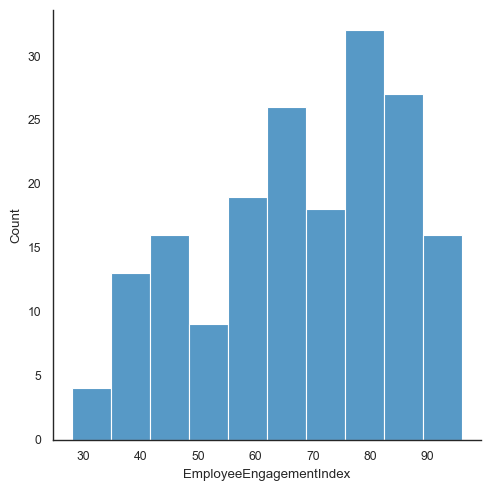

In [19]:
#Plottong target
sns.set_style('white')
sns.set_context('paper', font_scale = 1)
sns.displot(data=data2, x='EmployeeEngagementIndex', kind='hist', bins = 10, aspect = 1)

From the histogram above we can indicate that the target variable has mixture distribution

In [20]:
#Check target distribution
#Normality test perform Kolmogorov-Smirnov test
from scipy.stats import kstest

kstest(target, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

From the result we know that the target variable is not Normal Distributed so that we must be avoid to use OLS regression method.

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.43it/s]


sumsquare_error         aic          bic  kl_div  ks_statistic  ks_pvalue
beta            0.122473  866.276435 -1291.936277     inf      0.123489   0.007512
norm            0.122888  899.697771 -1301.712619     inf      0.107367   0.029184
lognorm         0.122925  902.625609 -1296.466597     inf      0.106944   0.030164
gamma           0.123035  902.249298 -1296.304673     inf      0.111472   0.021034
uniform         0.124151  847.901541 -1299.872575     inf      0.198366   0.000001

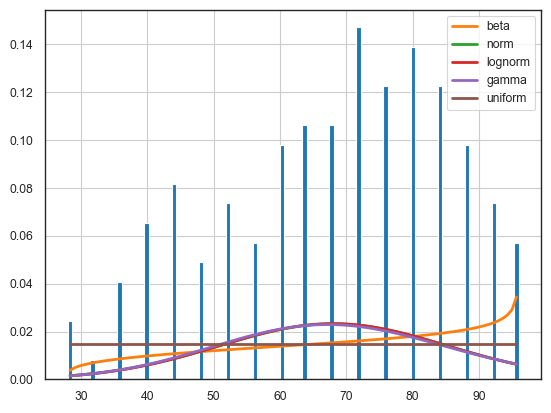

In [21]:
#Check other distribution
from fitter import Fitter, get_common_distributions, get_distributions

dist_names = ['weibull_min','norm','weibull_max','beta','invgauss',
              'uniform','gamma','expon','lognorm','burr']
f = Fitter(target, distributions=dist_names)
f.fit()
f.summary()

#from the check distribution, we know that the target close to the beta and normal distribution, so that lets modeling using Generalized Models method

In [32]:
#preprocessing data and encode the categorical features
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#categorical_features = ['JenisKelamin', 'Usia', 'Departemen', 'LokasiPerusahaan', 'StatusPegawai','StatusPernikahan',
#                      'Pendidikan']
#numerical_feature = ['Gaji', 'KecerdasanIntelektual','KecerdasanEmosi','LamaBekerja']
#label= target
#dataX= data2[categorical_features+numerical_feature]

#Data Pre-Processing
#numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))
#,('scaler', StandardScaler())])
#categorical_transformer = OneHotEncoder(categories='auto',drop='first', sparse=False)
#encoder = ColumnTransformer(
#transformers=[
#('numerical', numeric_transformer, numerical_feature),
#('categorical', categorical_transformer, categorical_features)])
#encoder.fit(dataX)

#One hot encoding cannot be used because size of data is not enough

In [23]:
#Label Encoder and Ordinal Encoder
#Ordinal Encoder for Pendidikan and Usia, because of only us know that the order of ordinal data so that we ordinal encoder manually
from sklearn import preprocessing

data2['Pendidikan_code'] = np.where(data2['Pendidikan']=='S2',3,
                                   np.where(data2['Pendidikan']=='S1/D4',2,1))
data2['Usia_code'] = np.where(data2['Usia']=='20-25',1,
                             np.where(data2['Usia']=='26-30',2,
                                     np.where(data2['Usia']=='31-35',3,
                                             np.where(data2['Usia']=='36-40',4,5))))

#label encoder for other categorical features
label_encoder = preprocessing.LabelEncoder()
data2['JenisKelamin_code']= label_encoder.fit_transform(data2['JenisKelamin'])
data2['Departemen_code']= label_encoder.fit_transform(data2['Departemen'])
data2['LokasiPerusahaan_code']= label_encoder.fit_transform(data2['LokasiPerusahaan'])
data2['StatusPegawai_code']= label_encoder.fit_transform(data2['StatusPegawai'])
data2['StatusPernikahan_code']= label_encoder.fit_transform(data2['StatusPernikahan'])

In [34]:
#variable y
Xdata=data2[['JenisKelamin_code', 'Usia_code', 'Departemen_code', 'LokasiPerusahaan_code', 'StatusPegawai_code', 'Gaji',
            'KecerdasanIntelektual', 'KecerdasanEmosi', 'StatusPernikahan_code','LamaBekerja', 'Pendidikan_code']]
datay=data2['EmployeeEngagementIndex']
datay2=pd.DataFrame(datay, columns=['EmployeeEngagementIndex'])

In [35]:
#GLM models
import statsmodels.api as sm

data_endog = datay
data_exog = sm.add_constant(Xdata)
gaussian_model = sm.GLM(data_endog, data_exog, family=sm.families.Gaussian())
gaussian_results = gaussian_model.fit()
print(gaussian_results.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     EmployeeEngagementIndex   No. Observations:                  180
Model:                                 GLM   Df Residuals:                      168
Model Family:                     Gaussian   Df Model:                           11
Link Function:                    identity   Scale:                         0.22702
Method:                               IRLS   Log-Likelihood:                -115.76
Date:                     Thu, 22 Jun 2023   Deviance:                       38.139
Time:                             17:25:09   Pearson chi2:                     38.1
No. Iterations:                          3   Pseudo R-squ. (CS):              1.000
Covariance Type:                 nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

The factors that have significant effect to employee engagement index are Status Pegawai, Kecerdasan Emosi, and Lama Bekerja otherwise did not have significant impact to Employee engagement Index.


## Model 3. Forecast one year step using Direct multi-step forecasting - ForecasterAutoregDirect

In [120]:
#import data time series
data_ts = pd.read_excel('data_simulated_modeling.xlsx', sheet_name='data_for_timeseries')

In [121]:
data_ts

date  EmployeeEngagementIndex  EmployeeEngagementIndex2
0   2007-01-01                37.980800                 22.980800
1   2007-02-01                36.180100                 21.180100
2   2007-03-01                41.053400                 26.053400
3   2007-04-01                48.338867                 33.338867
4   2007-05-01                47.546342                 32.546342
5   2007-06-01                53.476104                 38.476104
6   2007-07-01                56.860613                 41.860613
7   2007-08-01                59.522329                 44.522329
8   2007-09-01                77.125778                 62.125778
9   2007-10-01                75.150280                 60.150280
10  2007-11-01                38.755434                 23.755434
11  2007-12-01                42.728322                 27.728322
12  2008-01-01                41.389018                 26.389018
13  2008-02-01                42.885882                 27.885882
14  2008-03-01                47.012642                 32.012642
15  2008-04-01                50.920969                 35.920969
16  2008-05-01                55.844300                 40.844300
17  2008-06-01                60.151406                 45.151406
18  2008-07-01                63.294710                 48.294710
19  2008-08-01                69.960539                 54.960539
20  2008-09-01                96.308051                 81.308051
21  2008-10-01                81.932534                 66.932534
22  2008-11-01                43.766980                 28.766980
23  2008-12-01                50.612127                 35.612127
24  2009-01-01                47.049117                 32.049117
25  2009-02-01                51.069626                 36.069626
26  2009-03-01                54.051379                 39.051379
27  2009-04-01                55.811892                 40.811892
28  2009-05-01                67.285206                 52.285206
29  2009-06-01                68.589738                 53.589738
30  2009-07-01                68.969198                 53.969198
31  2009-08-01                74.130358                 59.130358
32  2009-09-01                81.330763                 66.330763
33  2009-10-01                80.311257                 65.311257
34  2009-11-01                47.525824                 32.525824
35  2009-12-01                55.257230                 40.257230
36  2010-01-01                52.710782                 37.710782
37  2010-02-01                56.124982                 41.124982
38  2010-03-01                58.897764                 43.897764
39  2010-04-01                62.313362                 47.313362
40  2010-05-01                74.083723                 59.083723
41  2010-06-01                72.537176                 57.537176
42  2010-07-01                81.580302                 66.580302
43  2010-08-01                81.400947                 66.400947
44  2010-09-01                92.665305                 77.665305
45  2010-10-01                93.727594                 78.727594
46  2010-11-01                52.876165                 37.876165
47  2010-12-01                55.933994                 40.933994
48  2011-01-01                57.787166                 42.787166
49  2011-02-01                61.492741                 46.492741
50  2011-03-01                59.418877                 44.418877
51  2011-04-01                70.775844                 55.775844
52  2011-05-01                71.950195                 56.950195
53  2011-06-01                74.432369                 59.432369
54  2011-07-01                80.485511                 65.485511
55  2011-08-01                78.854235                 63.854235
56  2011-09-01                97.108940                 82.108940
57  2011-10-01                84.683354                 69.683354
58  2011-11-01                46.382252                 31.382252
59  2011-12-01                48.527317           

<AxesSubplot:xlabel='date', ylabel='EmployeeEngagementIndex'>

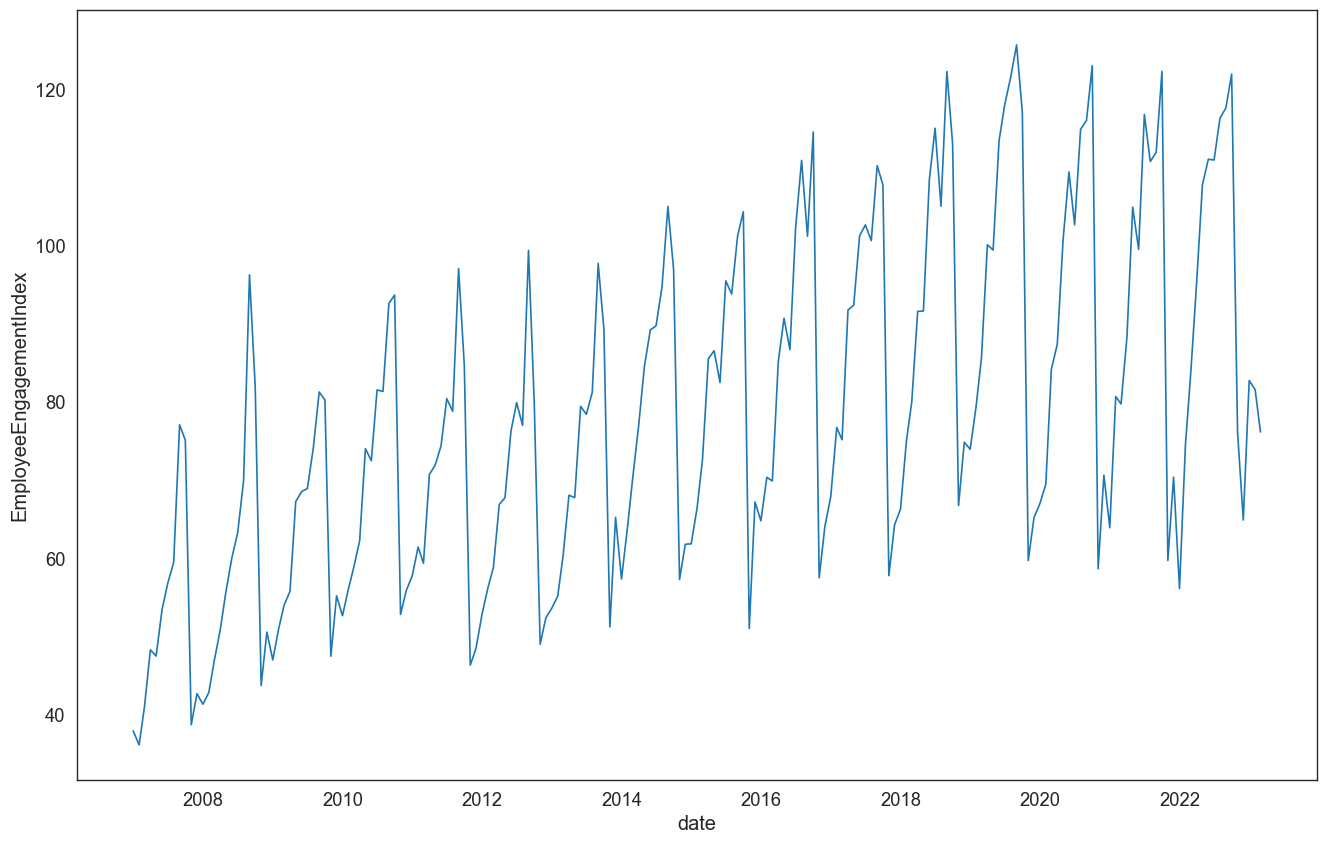

In [110]:
#Plot the trend of Employee EngagementIndex
#line plot
fig, ax = plt.subplots(figsize=(16,10))
sns.set_context('paper', font_scale = 1.5)
sns.lineplot(x='date', y='EmployeeEngagementIndex', data=data_ts)

<AxesSubplot:xlabel='date', ylabel='EmployeeEngagementIndex'>

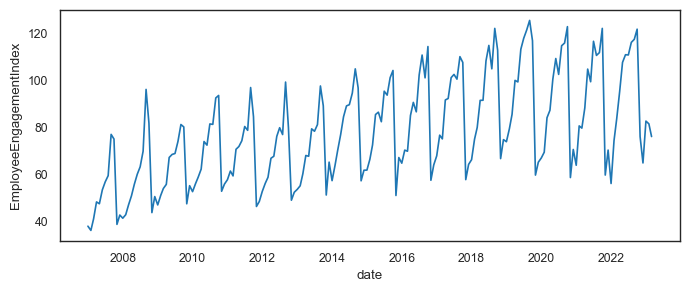

In [212]:
#line plot
fig, ax = plt.subplots(figsize=(8,3))
sns.set_context('paper', font_scale = 1.5)
sns.lineplot(x='date', y='EmployeeEngagementIndex', data=data_ts)

Train dates : 0 --- 158  (n=159)
Test dates  : 159 --- 194  (n=36)


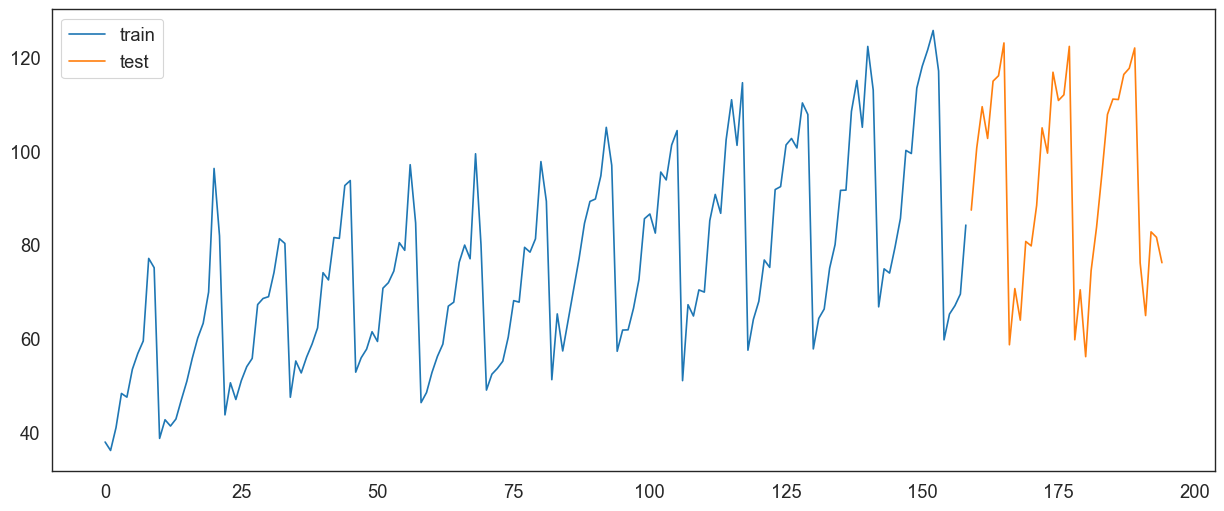

In [111]:
# Split data into train-test
steps = 36
data_train = data_ts[:-steps]
data_test  = data_ts[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax = plt.subplots(figsize=(15, 6))
data_train['EmployeeEngagementIndex'].plot(ax=ax, label='train')
data_test['EmployeeEngagementIndex'].plot(ax=ax, label='test')
ax.legend()

In [112]:
#Create and train forecaster
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

#Create forecaster
forecaster = ForecasterAutoregDirect(
                regressor     = Lasso(random_state=123),
                transformer_y = StandardScaler(),
                steps         = 36,
                lags          = 8
             )

forecaster

ForecasterAutoregDirect 
Regressor: Lasso(random_state=123) 
Lags: [1 2 3 4 5 6 7 8] 
Transformer for y: StandardScaler() 
Transformer for exog: None 
Weight function included: False 
Window size: 8 
Maximum steps predicted: 36 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': 123, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-06-22 18:34:23 
Last fit date: None 
Skforecast version: 0.8.1 
Python version: 3.9.13 
Forecaster id: None 

In [113]:
# Hyperparameter Grid search
from skforecast.exceptions import LongTrainingWarning
warnings.simplefilter('ignore', category=LongTrainingWarning)

forecaster = ForecasterAutoregDirect(
                regressor     = Lasso(random_state=123),
                transformer_y = StandardScaler(),
                steps         = 36,
                lags          = 8
             )

param_grid = {'alpha': np.logspace(-5, 5, 10)}
lags_grid = [5, 12, 20]

results_grid = grid_search_forecaster(
                    forecaster         = forecaster,
                    y                  = data_train['EmployeeEngagementIndex'],
                    param_grid         = param_grid,
                    lags_grid          = lags_grid,
                    steps              = 36,
                    refit              = True,
                    metric             = 'mean_absolute_percentage_error',
                    initial_train_size = int(len(data_train)*0.5),
                    fixed_train_size   = False,
                    return_best        = True,
                    verbose            = False
                )

Number of models compared: 30.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'alpha': 0.021544346900318846}
  Backtesting metric: 0.10998580787585135



In [114]:
#Grid Search results
results_grid.head()

lags                            params  mean_absolute_percentage_error     alpha
13            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   {'alpha': 0.021544346900318846}                        0.109986  0.021544
23  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   {'alpha': 0.021544346900318846}                        0.115414  0.021544
12            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  {'alpha': 0.0016681005372000592}                        0.117579  0.001668
10            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]                  {'alpha': 1e-05}                        0.117665  0.000010
11            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  {'alpha': 0.0001291549665014884}                        0.117686  0.000129

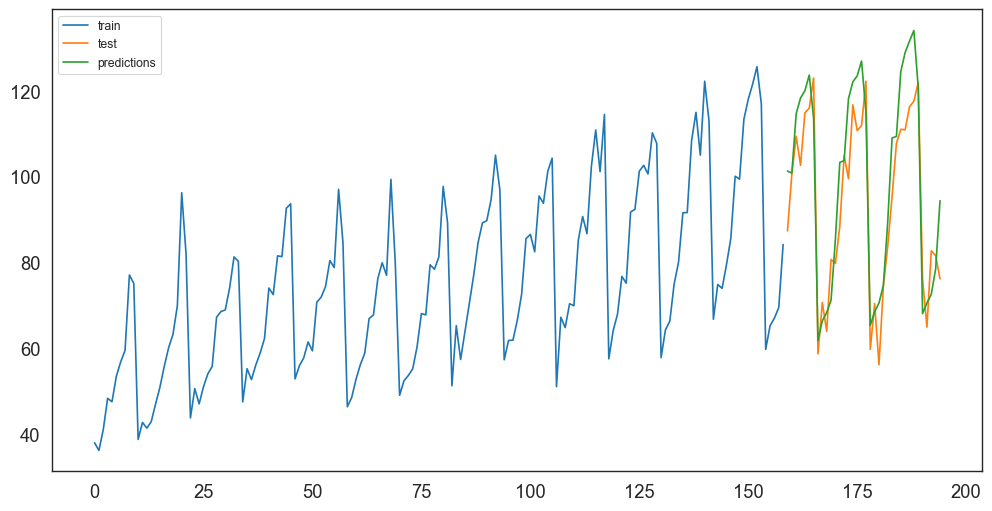

In [115]:
#Making Predictions
predictions = forecaster.predict()
#Create graph for comparing
fig, ax = plt.subplots(figsize=(12,6))
data_train['EmployeeEngagementIndex'].plot(ax=ax, label='train')
data_test['EmployeeEngagementIndex'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
sns.set_context('paper', font_scale = 1)
ax.legend()

In [122]:
#Forecast one year ahead
#Change date for index
data_ts['date'] = pd.to_datetime(data_ts['date'], format='%Y-%m-%d')
data_ts = data_ts.set_index('date')

#data_test change index
data_test = data_ts[-36:]
data_test

EmployeeEngagementIndex  EmployeeEngagementIndex2
date                                                         
2020-04-01                87.433600                 72.433600
2020-05-01               100.649700                 85.649700
2020-06-01               109.473600                 94.473600
2020-07-01               102.704300                 87.704300
2020-08-01               114.923200                 99.923200
2020-09-01               116.071200                101.071200
2020-10-01               123.069100                108.069100
2020-11-01                58.713500                 43.713500
2020-12-01                70.695900                 55.695900
2021-01-01                63.964100                 48.964100
2021-02-01                80.740500                 65.740500
2021-03-01                79.797000                 64.797000
2021-04-01                88.431200                 73.431200
2021-05-01               104.964800                 89.964800
2021-06-01                99.570900                 84.570900
2021-07-01               116.825300                101.825300
2021-08-01               110.803800                 95.803800
2021-09-01               112.005300                 97.005300
2021-10-01               122.331900                107.331900
2021-11-01                59.775300                 44.775300
2021-12-01                70.439800                 55.439800
2022-01-01                56.176000                 41.176000
2022-02-01                74.525800                 59.525800
2022-03-01                83.793400                 68.793400
2022-04-01                95.414400                 80.414400
2022-05-01               107.821949                 92.821949
2022-06-01               111.098161                 96.098161
2022-07-01               110.997914                 95.997914
2022-08-01               116.353430                101.353430
2022-09-01               117.658900                102.658900
2022-10-01               121.994100                106.994100
2022-11-01                76.182200                 61.182200
2022-12-01                64.943500                 49.943500
2023-01-01                82.788700                 67.788700
2023-02-01                81.625500                 66.625500
2023-03-01                76.213700                 61.213700

In [159]:
#Forecast 12 lag or one year ahed
end_date = data_test['EmployeeEngagementIndex'][-40:]
forecast_12=forecaster.predict(last_window=end_date, steps=13)
index_date = pd.to_datetime(['2023-04-01','2023-05-01','2023-06-01','2023-07-01','2023-08-01','2023-09-01',
            '2023-10-01','2023-11-01','2023-12-01','2024-01-01','2024-02-01','2024-03-01','2024-04-01'])
forecast_12.index = index_date

In [161]:
forecast_12_df=pd.DataFrame(forecast_12)
forecast_12_df

pred
2023-04-01   95.746412
2023-05-01  107.617191
2023-06-01  111.254501
2023-07-01  110.946940
2023-08-01  114.266494
2023-09-01  115.827535
2023-10-01  117.577974
2023-11-01   75.688822
2023-12-01   65.995483
2024-01-01   82.116729
2024-02-01   81.102816
2024-03-01   77.312324
2024-04-01   97.416192

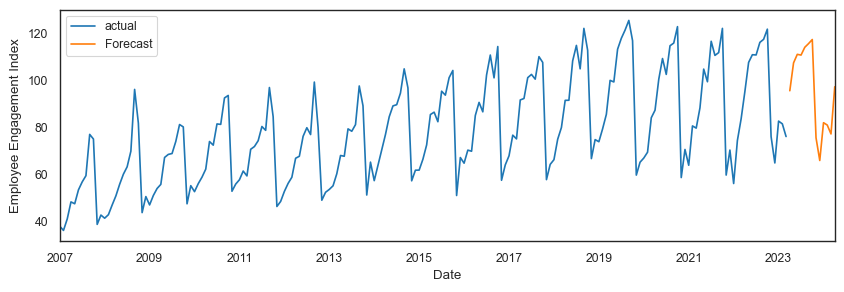

In [162]:
#Create graph forecasting
ax = data_ts['EmployeeEngagementIndex'].plot(label='actual', figsize=(10, 3))
forecast_12.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Employee Engagement Index')
plt.legend()
plt.show()

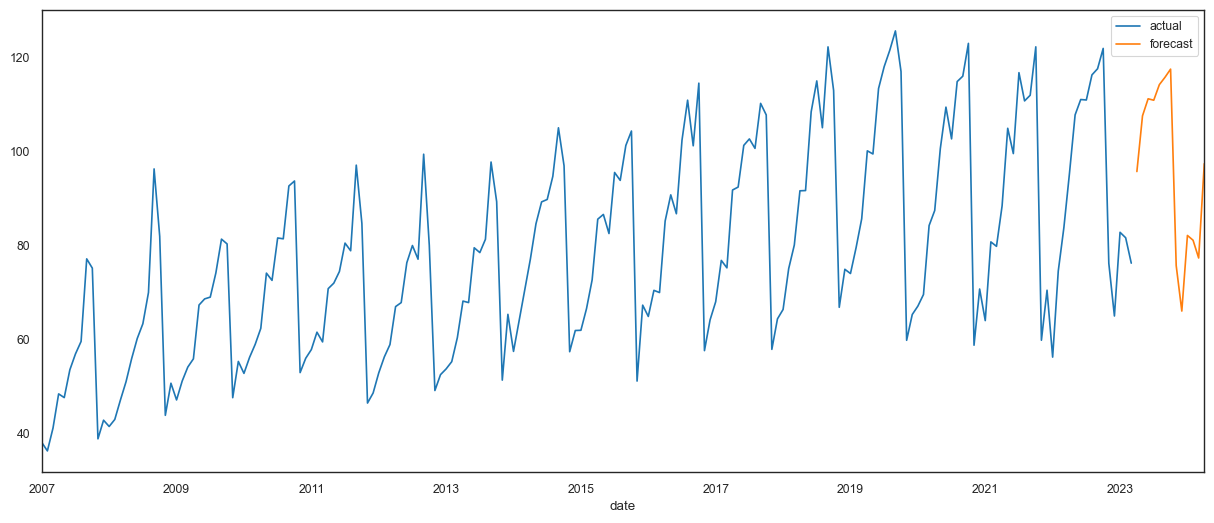

In [163]:
fig, ax = plt.subplots(figsize=(15, 6))
data_ts['EmployeeEngagementIndex'].plot(ax=ax, label='actual')
forecast_12_df['pred'].plot(ax=ax, label='forecast')
ax.legend()

In [164]:
#save forecast data to excel
#forecast_12_df.to_excel('hasil_forecast12.xlsx')

## Latent Semantic Analysis for capturing topic of unstructured data

In [179]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint

Loading BokehJS ...

In [165]:
data_rv = pd.read_csv('review_company_glassdor.csv')
data_rv

ID      Place           location           date             status                job_title                                            summary                                          positives                                          negatives                                     advice_to_mgmt  score_1  score_2  score_3  score_4  score_5  score_6  overall
0          1  startup_1                NaN   Dec 11, 2018  Current Employee        Anonymous Employee                           Best Company to work for                      People are smart and friendly                 Bureaucracy is slowing things down                                                NaN      4.0      5.0      5.0      4.0      5.0        0      5.0
1          2  startup_1  Mountain View, CA   Jun 21, 2013   Former Employee           Program Manager  Moving at the speed of light, burn out is inev...  1) Food, food, food. 15+ cafes on main campus ...  1) Work/life balance. What balance? All those ...  1) Don't dismiss emotional intelligence and ad...      2.0      3.0      3.0      5.0      3.0     2094      5.0
2          3  startup_1       New York, NY   May 10, 2014  Current Employee     Software Engineer III  Great balance between big-company security and...  * If you're a software engineer, you're among ...  * It *is* becoming larger, and with it comes g...  Keep the focus on the user. Everything else wi...      5.0      4.0      5.0      5.0      4.0      949      5.0
3          4  startup_1  Mountain View, CA    Feb 8, 2015  Current Employee        Anonymous Employee  The best place I've worked and also the most d...  You can't find a more well-regarded company th...  I live in SF so the commute can take between 1...  Keep on NOT micromanaging - that is a huge ben...      2.0      5.0      5.0      4.0      5.0      498      4.0
4         10  startup_1                NaN    Dec 9, 2018  Current Employee        Anonymous Employee                           Execellent for engineers             Impact driven. Best tech in the world.  Size matters. Engineers are a bit disconnected...                                                NaN      5.0      5.0      5.0      5.0      5.0        0      4.0
...      ...        ...                ...            ...                ...                      ...                                                ...                                                ...                                                ...                                                ...      ...      ...      ...      ...      ...      ...      ...
30331  67522  startup_6                NaN   Dec 22, 2010   Former Employee    Senior Project Managet                         Microsoft Services is bad.  MS is a good company but hire wrong people. Wo...  Senior management has no leadership and very o...  Major management revamp esp in APAC. It's not ...      3.0      NaN      1.5      2.0      1.0        0      2.0
30332  67524  startup_6                NaN   Dec 17, 2010   Former Employee    Senior Program Manager                                      Good company.         Good benefits package, huge customer base.            Politics, very slow, lots of dead wood.                                           Move on.      3.5      NaN      3.5      4.0      4.0        0      4.0
30333  67525  startup_6                NaN   Dec 16, 2010   Former Employee        Anonymous Employee  Enriching experience for a beginner but bad fo...  -Access to a wide range of technologies, compl...  -Testers(SDET's ) do not get as many opportuni...  Make the company leaner and Meaner. (which wou...      3.0      NaN      4.0      4.0      2.0        0      3.0
30334  67527  startup_6                NaN   Dec 15, 2010  Current Employee           Account Manager                                 Good Place to Work  Nice place to work. Good atmosphere with advan...  Management confusion at times with vision for ...                                                NaN      3.0      

In [166]:
data_rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30336 entries, 0 to 30335
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30336 non-null  int64  
 1   Place           30336 non-null  object 
 2   location        19082 non-null  object 
 3   date            30336 non-null  object 
 4   status          30336 non-null  object 
 5   job_title       30336 non-null  object 
 6   summary         30284 non-null  object 
 7   positives       30336 non-null  object 
 8   negatives       30336 non-null  object 
 9   advice_to_mgmt  17059 non-null  object 
 10  score_1         27150 non-null  float64
 11  score_2         24286 non-null  float64
 12  score_3         27167 non-null  float64
 13  score_4         27145 non-null  float64
 14  score_5         26851 non-null  float64
 15  score_6         30336 non-null  int64  
 16  overall         30336 non-null  float64
dtypes: float64(6), int64(2), object

In [168]:
#Check missing value
print("Total Missing Value:", data_rv.isna().sum().sum())
print("\nThe count of missing value in each column:\n", data_rv.isna().sum())

Total Missing Value: 43664

The count of missing value in each column:
 ID                    0
Place                 0
location          11254
date                  0
status                0
job_title             0
summary              52
positives             0
negatives             0
advice_to_mgmt    13277
score_1            3186
score_2            6050
score_3            3169
score_4            3191
score_5            3485
score_6               0
overall               0
dtype: int64


In [195]:
#Preparing LSA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

reindexed_data = data_rv['negatives']
stop_words = stopwords.words('english')
more_stopword =['cons','really']
data_stopword = stop_words+more_stopword
tfidf_vectorizer = TfidfVectorizer(stop_words=data_stopword, use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [196]:
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [197]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [198]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [199]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [200]:
#Topic with 3 word
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  work life balance
Topic 2:  life balance work
Topic 3:  hours long working
Topic 4:  think none moment
Topic 5:  nothing bad say
Topic 6:  company big large
Topic 7:  hard sometimes get
Topic 8:  much politics slow
Topic 9:  time full part
Topic 10:  good pay salary


In [201]:
#Topic with 2 word
top_n_words_lsa = get_top_n_words(2, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  work life
Topic 2:  life balance
Topic 3:  hours long
Topic 4:  think none
Topic 5:  nothing bad
Topic 6:  company big
Topic 7:  hard sometimes
Topic 8:  much politics
Topic 9:  time full
Topic 10:  good pay


In [202]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 30336 samples in 0.081s...
[t-SNE] Computed neighbors for 30336 samples in 12.228s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30336
[t-SNE] Computed conditional probabilities for sample 2000 / 30336
[t-SNE] Computed conditional probabilities for sample 3000 / 30336
[t-SNE] Computed conditional probabilities for sample 4000 / 30336
[t-SNE] Computed conditional probabilities for sample 5000 / 30336
[t-SNE] Computed conditional probabilities for sample 6000 / 30336
[t-SNE] Computed conditional probabilities for sample 7000 / 30336
[t-SNE] Computed conditional probabilities for sample 8000 / 30336
[t-SNE] Computed conditional probabilities for sample 9000 / 30336
[t-SNE] Computed conditional probabilities for sample 10000 / 30336
[t-SNE] Computed conditional probabilities for sample 11000 / 30336
[t-SNE] Computed conditional probabilities for sample 12000 / 30336
[t-SNE] Computed conditional probabilities for s

In [203]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        reviews_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                reviews_in_that_topic.append(two_dim_vectors[i])    
        
        reviews_in_that_topic = np.vstack(reviews_in_that_topic)
        mean_review_in_that_topic = np.mean(reviews_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_review_in_that_topic)
    return mean_topic_vectors

In [204]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [211]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=900, plot_height=900)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

GlyphRenderer(id='1448', ...)

In [207]:
top_3_words_lsa

['work life balance',
 'life balance work',
 'hours long working',
 'think none moment',
 'nothing bad say',
 'company big large',
 'hard sometimes get',
 'much politics slow',
 'time full part',
 'good pay salary']

In [208]:
lsa_mean_topic_vectors

[array([  4.2996798, -13.101296 ], dtype=float32),
 array([ 61.343483, -10.417201], dtype=float32),
 array([40.777885, 39.941124], dtype=float32),
 array([23.487532, 66.97027 ], dtype=float32),
 array([ 3.8406389, 50.67607  ], dtype=float32),
 array([-34.36349 ,  42.276302], dtype=float32),
 array([-54.418434, -24.839035], dtype=float32),
 array([-49.071026 ,  -3.2522159], dtype=float32),
 array([ 3.0859823, 35.021927 ], dtype=float32),
 array([  1.3696  , -10.231951], dtype=float32)]

In [209]:
plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=900, plot_height=900)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color='black')
    plot.add_layout(label)
    
show(plot)

GlyphRenderer(id='1275', ...)